## Homework5

### Computer Problems on Scientific Computing: An Introductory Survey

#### 6.2
6.2. Consider the function $f$ defined by
$$
f(x)=\left\{\begin{array}{ll}
0.5 & \text { if } x=0 \\
(1-\cos (x)) / x^2 & \text { if } x \neq 0
\end{array} .\right.
$$
(a) Use l'Hôpital's rule to show that $f$ is continuous at $x=0$.

(b) Use differentiation to show that $f$ has a local maximum at $x=0$.

(c) Use a library routine, or one of your own design, to find a maximum of $f$ on the interval $[-2 \pi, 2 \pi]$, on which $-f$ is unimodal. Experiment with the error tolerance to determine how accurately the routine can approximate the known solution at $x=0$.

(d) If you have difficulty in obtaining a highly accurate result, try to explain why. (Hint: Make a plot of $f$ in the vicinity of $x=0$, say on the interval $[-0.001,0.001]$ with a spacing of $0.00001$ between points.)

(e) Can you devise an alternative formulation of $f$ such that the maximum can be determined more accurately? (Hint: Consider a double angle formula.)

(a): 
$$
\lim_{x\to 0} f(x) = \lim_{x\to 0} (1-\cos (x)) / x^2 = \lim_{x\to 0} \sin (x) / 2x \\
 = \lim_{x\to 0} \cos(x) / 2 = \frac12
$$

(b):
$$
f'(0) = \lim_{x\to 0} \frac{(1-\cos (x))  - x^2/2}{x^3} = \lim_{x\to 0} \frac{O(x^4)}{x^3} = 0
$$
于是 $x = 0$ 是局部极值；显而易见是局部极大值

(c): 使用黄金分割搜索法尝试求单峰函数的极大值

In [10]:
import math
def golden_search(func, a0, b0, tol = 1e-3):
    """
    使用黄金分割搜索方法计算 func 在 a0，b0 区间内的极大值,tol 表示容许误差
    """
    t = (math.sqrt(5) - 1) / 2; tminus = 1 - t
    # 第一步搜索
    delta = b0 - a0
    p0 = a0 + tminus * delta
    q0 = a0 + t * delta
    while delta > tol:
        if func(p0) <= func(q0):
            delta = q0 - a0
            b0, q0 = q0, p0
            p0 = a0 + tminus * (b0 - a0)
            
        else:
            delta = b0 - p0
            a0, p0 = p0, q0
            q0 = a0 + t * (b0 - a0)

    return (p0 + q0) / 2

func = lambda x: -(1 - math.cos(x)) / x**2 if x != 0 else -1/2

golden_search(func, -2*math.pi, 2*math.pi, tol = 1e-8)

-6.0223190928973785e-05

(d): 可见确实出现了不准确的情况，通过题目的暗示我们可以明显发现这个曲线在真实值附近有剧烈的波动

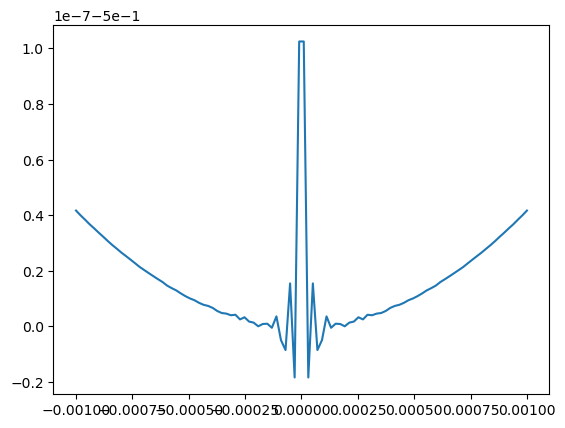

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(-0.001, 0.001, 100), np.vectorize(func)(np.linspace(-0.001, 0.001, 100)))

(e): 使用二倍角公式变换方程到
$$
f(x) = 2\sin^2 (x/2) / x^2
$$

In [12]:
func = lambda x: -2*math.sin(x/2)**2 / x**2 if x != 0 else -1/2
golden_search(func, -2*math.pi, 2*math.pi, tol = 1e-8)

-4.042240759573828e-08

可见准确了非常多

#### 6.3
Use a library routine, or one of your own design, to find a minimum of each of the following functions on the interval $[0,3]$. Draw a plot of each function to confirm that it is unimodal.

(a) $f(x)=x^4-14 x^3+60 x^2-70 x$.

(b) $f(x)=0.5 x^2-\sin (x)$.

(c) $f(x)=x^2+4 \cos (x)$.

(d) $f(x)=\Gamma(x)$. (The gamma function, defined by
$$
\Gamma(x)=\int_0^{\infty} t^{x-1} e^{-t} d t, \quad x>0,
$$
is a built-in function on many computer systems.)

本题中依然使用黄金分割搜索方法来计算极小值。画出的四幅图像从左到右从上到下依次对应 (a)~(d)，蓝色的 marker 对应计算出的极小值点

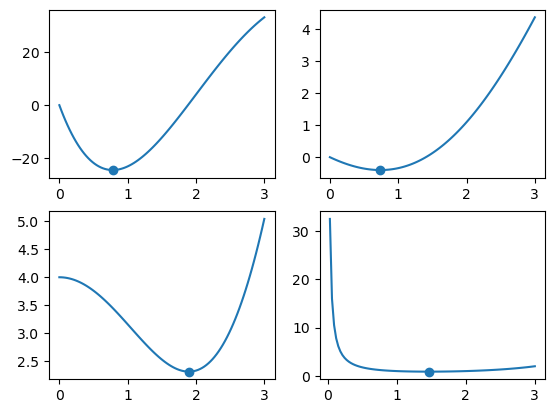

In [13]:
func1 = lambda x: x**4 - 14*x**3 + 60*x**2 - 70 *x 
func2 = lambda x: 0.5*x**2 - math.sin(x)
func3 = lambda x: x**2 + 4 * math.cos(x)
func4 = lambda x: math.gamma(x)

fig, ax = plt.subplots(2, 2, )
ax[0,0].plot(np.linspace(0,3, 100), np.vectorize(func1)(np.linspace(0,3, 100)))
ax[0,1].plot(np.linspace(0,3, 100), np.vectorize(func2)(np.linspace(0,3, 100)))
ax[1,0].plot(np.linspace(0,3, 100), np.vectorize(func3)(np.linspace(0,3, 100)))
ax[1,1].plot(np.linspace(0,3, 100)[1:], np.vectorize(func4)(np.linspace(0,3, 100)[1:]))

ax[0,0].scatter(golden_search(func1, a0 = 0, b0 = 3), func1(golden_search(func1, a0 = 0, b0 = 3)))
ax[0,1].scatter(golden_search(func2, a0 = 0, b0 = 3), func2(golden_search(func2, a0 = 0, b0 = 3)))
ax[1,0].scatter(golden_search(func3, a0 = 0, b0 = 3), func3(golden_search(func3, a0 = 0, b0 = 3)))
ax[1,1].scatter(golden_search(func4, a0 = 0, b0 = 3), func4(golden_search(func4, a0 = 0, b0 = 3)))

plt.show()

#### 6.7
Consider the function $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ defined by
$$
f(x, y)=2 x^3-3 x^2-6 x y(x-y-1) .
$$
(a) Determine all of the critical points of $f$ analytically (i.e., without using a computer).

(b) Classify each critical point found in part $a$ as a minimum, a maximum, or a saddle point, again working analytically.

(c) Verify your analysis graphically by creating a contour plot or three-dimensional surface plot of $f$ over the region $-2 \leq x \leq 2,-2 \leq y \leq 2$.

(d) Use a library routine for minimization to find the minima of both $f$ and $-f$. Experiment with various starting points to see how well the routine gets around other types of critical points to find minima and maxima. You may find it instructive to plot the sequence of iterates generated by the routine.

(a): 
$$
f'_x(x,y) = 6x^2 - 6x - 12xy +6y^2 + 6y\\
g'_y(x,y) = -6x^2 + 6x + 12xy
$$
得到的四个 critial point 分别为:
$$
(0,-1), (0,0), (1, 0), (-1, -1)
$$

(b): 计算 Hessian 矩阵
$$
H_f = 6\begin{pmatrix}
    2x-2y-1& 2y-2x+1\\
    2y-2x+1& 2x
    \end{pmatrix}
$$
在 $(0,-1)$ 点处为鞍点; 在 $(0,0)$ 点处为鞍点; 在 $(1,0)$ 点处为极小值; 在 $(-1,-1)$ 点处为极大值;  

(c): 绘制图像

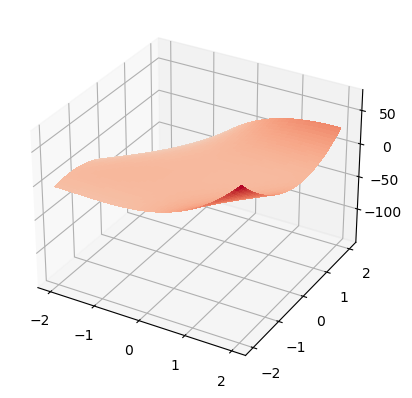

In [14]:
func = lambda x,y: 2*x**3 -3*x**2-6*x*y*(x-y-1)
x, y = np.linspace(-2,2,100), np.linspace(-2,2,100)
X, Y = np.meshgrid(x,y)
R = np.vectorize(func)(X,Y)

from matplotlib import cm
from matplotlib.ticker import LinearLocator
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, R, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

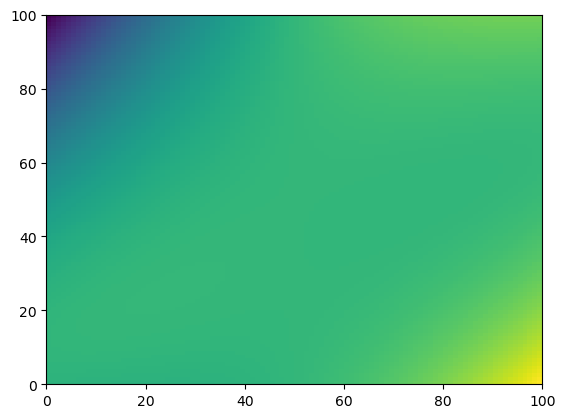

In [15]:
plt.pcolormesh(R)

(d): 使用阻尼牛顿法计算最小值

In [16]:
"""Wolfe Condtions"""
def wolfe_condition(f, df, c1, c2, x, alpha, p):
    condition1 = f(x+alpha*p)-f(x)-c1*alpha*np.dot(df(x),p)
    condition2 = np.dot(df(x+alpha*p),p) - c2*np.dot(df(x),p)
    return [condition1<0, condition2>0]

"""backtracking method to find alpha"""
def backtracking(Bool, f, df, c1, c2, x0, alpha, rho, p):
    n = 0
    while Bool[0] == False:
        alpha = alpha*rho
        Bool = wolfe_condition(f, df, c1, c2, x0, alpha, p)
        n += 1
    if Bool[1] == False:
        print("请调整rho值使得curvature条件成立")
        return alpha     
    if Bool == [True,True]:
        if f(x0+alpha*p)-f(x0) >0:
            print("Warnings: wolfe condition crashed")
        return alpha

def step_iteration(f, df, d2f, x0, alpha, c1, c2, rho):
    p = - np.linalg.solve(d2f(x0), df(x0))
    lam = df(x0).T @ d2f(x0) @ df(x0)
    alpha = backtracking(wolfe_condition(f, df, c1, c2, x0, alpha, p),f, df, c1, c2 ,x0, alpha, rho, p)
    x1 = x0 + alpha* p
    return x1, lam

def dumped_Newton(f, df, d2f, x0, rho, xstar, alpha = 1, c1 = 1e-2, c2 = 0.9, tol = 1e-4, limited_n = 1000):
    x0 = np.array(x0); x_his = [x0.tolist()]
    x1,lam = step_iteration(f, df, d2f, x0, alpha, c1, c2, rho)
    n1 = 1
    loss = [abs(f(x1)-f(xstar))]
    while lam > tol :
        x0 = x1; x_his.append(x0.tolist())
        x1, lam = step_iteration(f, df, d2f, x0, alpha, c1, c2, rho)
        if n1 > limited_n:
            print(f'Iteration has completed {limited_n} times in Dumped Newton. Stop.')
            break
        loss.append(abs(f(x1)-f(xstar)))
        n1 += 1
        if n1%100 == 1:
            alpha *= rho
    print(f'x1:{x1},loss:{loss[-1]},迭代次数:{n1},最后一步的alpha为{alpha} ')
    loss = np.array(loss)
    return x1, loss, n1, np.array(x_his)

x1:[1.00000000e+00 4.41711862e-21],loss:0.0,迭代次数:5,最后一步的alpha为1 


C:\Users\MiracleLpX\AppData\Local\Temp\ipykernel_12872\1952692525.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.arange(0,n1,1),np.log10(loss))


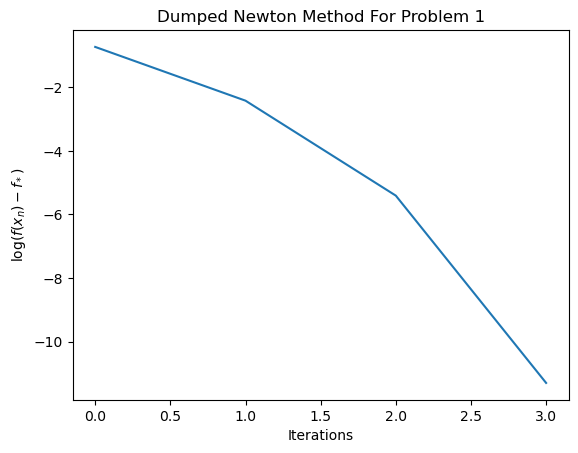

In [17]:
def func(x): 
    return 2*x[0]**3 -3*x[0]**2-6*x[0]*x[1]*(x[0]-x[1]-1)

def dfunc(x): 
    return 6*np.array([x[0]**2 - x[0] - 2*x[0]*x[1] + x[1]**2 + x[1], -x[0]**2 + x[0] + 2*x[0]*x[1]])

def d2func(x):
    return 6*np.array(
        [
            [2*x[0] - 2*x[1] -1, 2*x[1] - 2*x[0]+1],
            [2*x[1] - 2*x[0]+1, 2*x[0]]
        ]
    )

xstar = np.array([1,0])
x1 ,loss, n1, x_his = dumped_Newton(func, dfunc, d2func, (1,0.3), 0.95, xstar= xstar)
plt.plot(np.arange(0,n1,1),np.log10(loss))
plt.title('Dumped Newton Method For Problem 1')
plt.xlabel('Iterations')
plt.ylabel('$\log(f(x_n)-f_*)$')
plt.show()

#### 6.9
Write a program to find a minimum of Rosenbrock's function,
$$
f(x, y)=100\left(y-x^2\right)^2+(1-x)^2
$$
using each of the following methods:

(a) Steepest descent

(b) Newton

(c) Damped Newton (Newton's method with a line search)

You should try each of the methods from each of the three starting points $\left[\begin{array}{ll}-1 & 1\end{array}\right]^T,\left[\begin{array}{ll}0 & 1\end{array}\right]^T$, and $\left[\begin{array}{ll}2 & 1\end{array}\right]^T$. For any line searches and linear system solutions required, you may use either library routines or routines of your own design. Plot the path taken in the plane by the approximate solutions for each method from each starting point.

阻尼牛顿法的代码已经在上面出现过，下面补充最速下降和牛顿法的代码

In [18]:
def gradient_descent(f, df,  x0, rho, xstar, alpha = 1, c1 = 1e-2, c2 = 0.9, tol = 1e-4, limited_n = 1000):
    def step_iteration(f, df, c1, c2, x0, alpha, rho, rho2 = 0.99):
        p = - df(x0)
        x1 = x0 + alpha* p   
        return x1
    x0 = np.array(x0); x_his = [x0.tolist()]
    xstar = np.array(xstar)
    x1 = step_iteration(f, df, c1, c2, x0, alpha, rho)
    n = 1
    loss = [abs(f(x1)-f(xstar))]
    while loss[-1]>tol:
        x0 = x1; x_his.append(x0.tolist())
        x1 = step_iteration(f, df, c1, c2, x0, alpha, rho)
        if n > limited_n:
            print(f'Iteration has completed {limited_n} times in GD. Stop.')
            break
        loss.append(abs(f(x1)-f(xstar)))
        n += 1
        if n%10 == 1:
            alpha *= rho
    print(f'GD: x1:{x1},loss:{loss[-1]},迭代次数:{n} ')
    return x1, loss, n, np.array(x_his)

def newton(f, df, d2f, x0, rho, xstar, alpha = 1, tol = 1e-4, limited_n = 1000):
    def step_iteration(f, df, d2f, x0, alpha):
        return x0 - alpha * f(x0) * np.linalg.inv(d2f(x0)) @ df(x0)
    x0 = np.array(x0); x_his = [x0.tolist()]
    xstar = np.array(xstar)
    x1 = step_iteration(f, df, d2f, x0, alpha)
    n = 1
    loss = [abs(f(x1)-f(xstar))]
    while loss[-1]>tol:
        x0 = x1; x_his.append(x0.tolist())
        x1 = step_iteration(f, df, d2f, x0, alpha)
        if n > limited_n:
            print(f'Iteration has completed {limited_n} times in NEWTON. Stop.')
            break
        loss.append(abs(f(x1)-f(xstar)))
        n += 1
        if n%10 == 1:
            alpha *= rho
    print(f'NEWTON: x1:{x1},loss:{loss[-1]},迭代次数:{n} ')
    return x1, loss, n, np.array(x_his)

In [19]:
"""Overview of function"""
def func(x):
    return 100*(x[1]-x[0]**2)**2+(1-x[0])**2

def dfunc(x):
    return np.array([-400*(x[1]-x[0]**2)*x[0]-2*(1-x[0]), 200*(x[1]-x[0]**2)])

def d2func(x):
    return np.array([[-400*x[1]+1200*x[0]**2+2, -400*x[0]],[-400*x[0], 200]])


Text(0.5, 0.92, 'Rosenbrock')

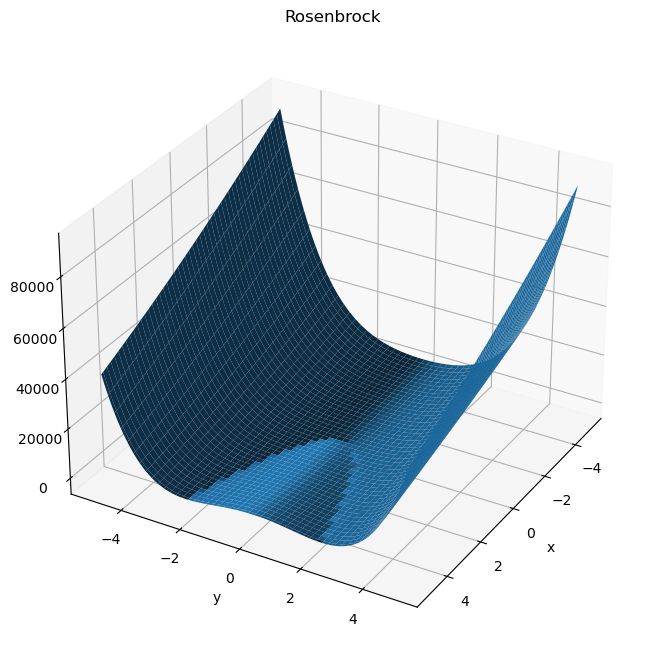

In [20]:
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)
z = np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        z[i,j] = func([x[i],y[j]])
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
surf = ax.plot_surface(X,Y,z)
ax.scatter(1,1,0,marker = '*',color = 'red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.view_init(30,30)
ax.set_title('Rosenbrock')

Iteration has completed 10000 times in GD. Stop.
GD: x1:[-0.81837084  0.67782061],loss:3.313016957692923,迭代次数:10001 
Iteration has completed 3000 times in NEWTON. Stop.
NEWTON: x1:[-0.32433121  0.10382235],loss:1.7540403977112788,迭代次数:3001 
x1:[0.99999998 0.99999993],loss:1.2064332009907054e-13,迭代次数:17,最后一步的alpha为1 
Iteration has completed 10000 times in GD. Stop.
GD: x1:[0.31263507 0.09465077],loss:0.4734253025386564,迭代次数:10001 
Iteration has completed 3000 times in NEWTON. Stop.
NEWTON: x1:[-0.03184392  0.13944151],loss:2.980918448281822,迭代次数:3001 
x1:[1. 1.],loss:0.0,迭代次数:14,最后一步的alpha为1 
Iteration has completed 10000 times in GD. Stop.
GD: x1:[-0.84426244  0.72086497],loss:3.407842126570777,迭代次数:10001 
Iteration has completed 3000 times in NEWTON. Stop.
NEWTON: x1:[1.97580689 3.78052709],loss:2.4721375033663393,迭代次数:3001 
x1:[1. 1.],loss:0.0,迭代次数:14,最后一步的alpha为1 


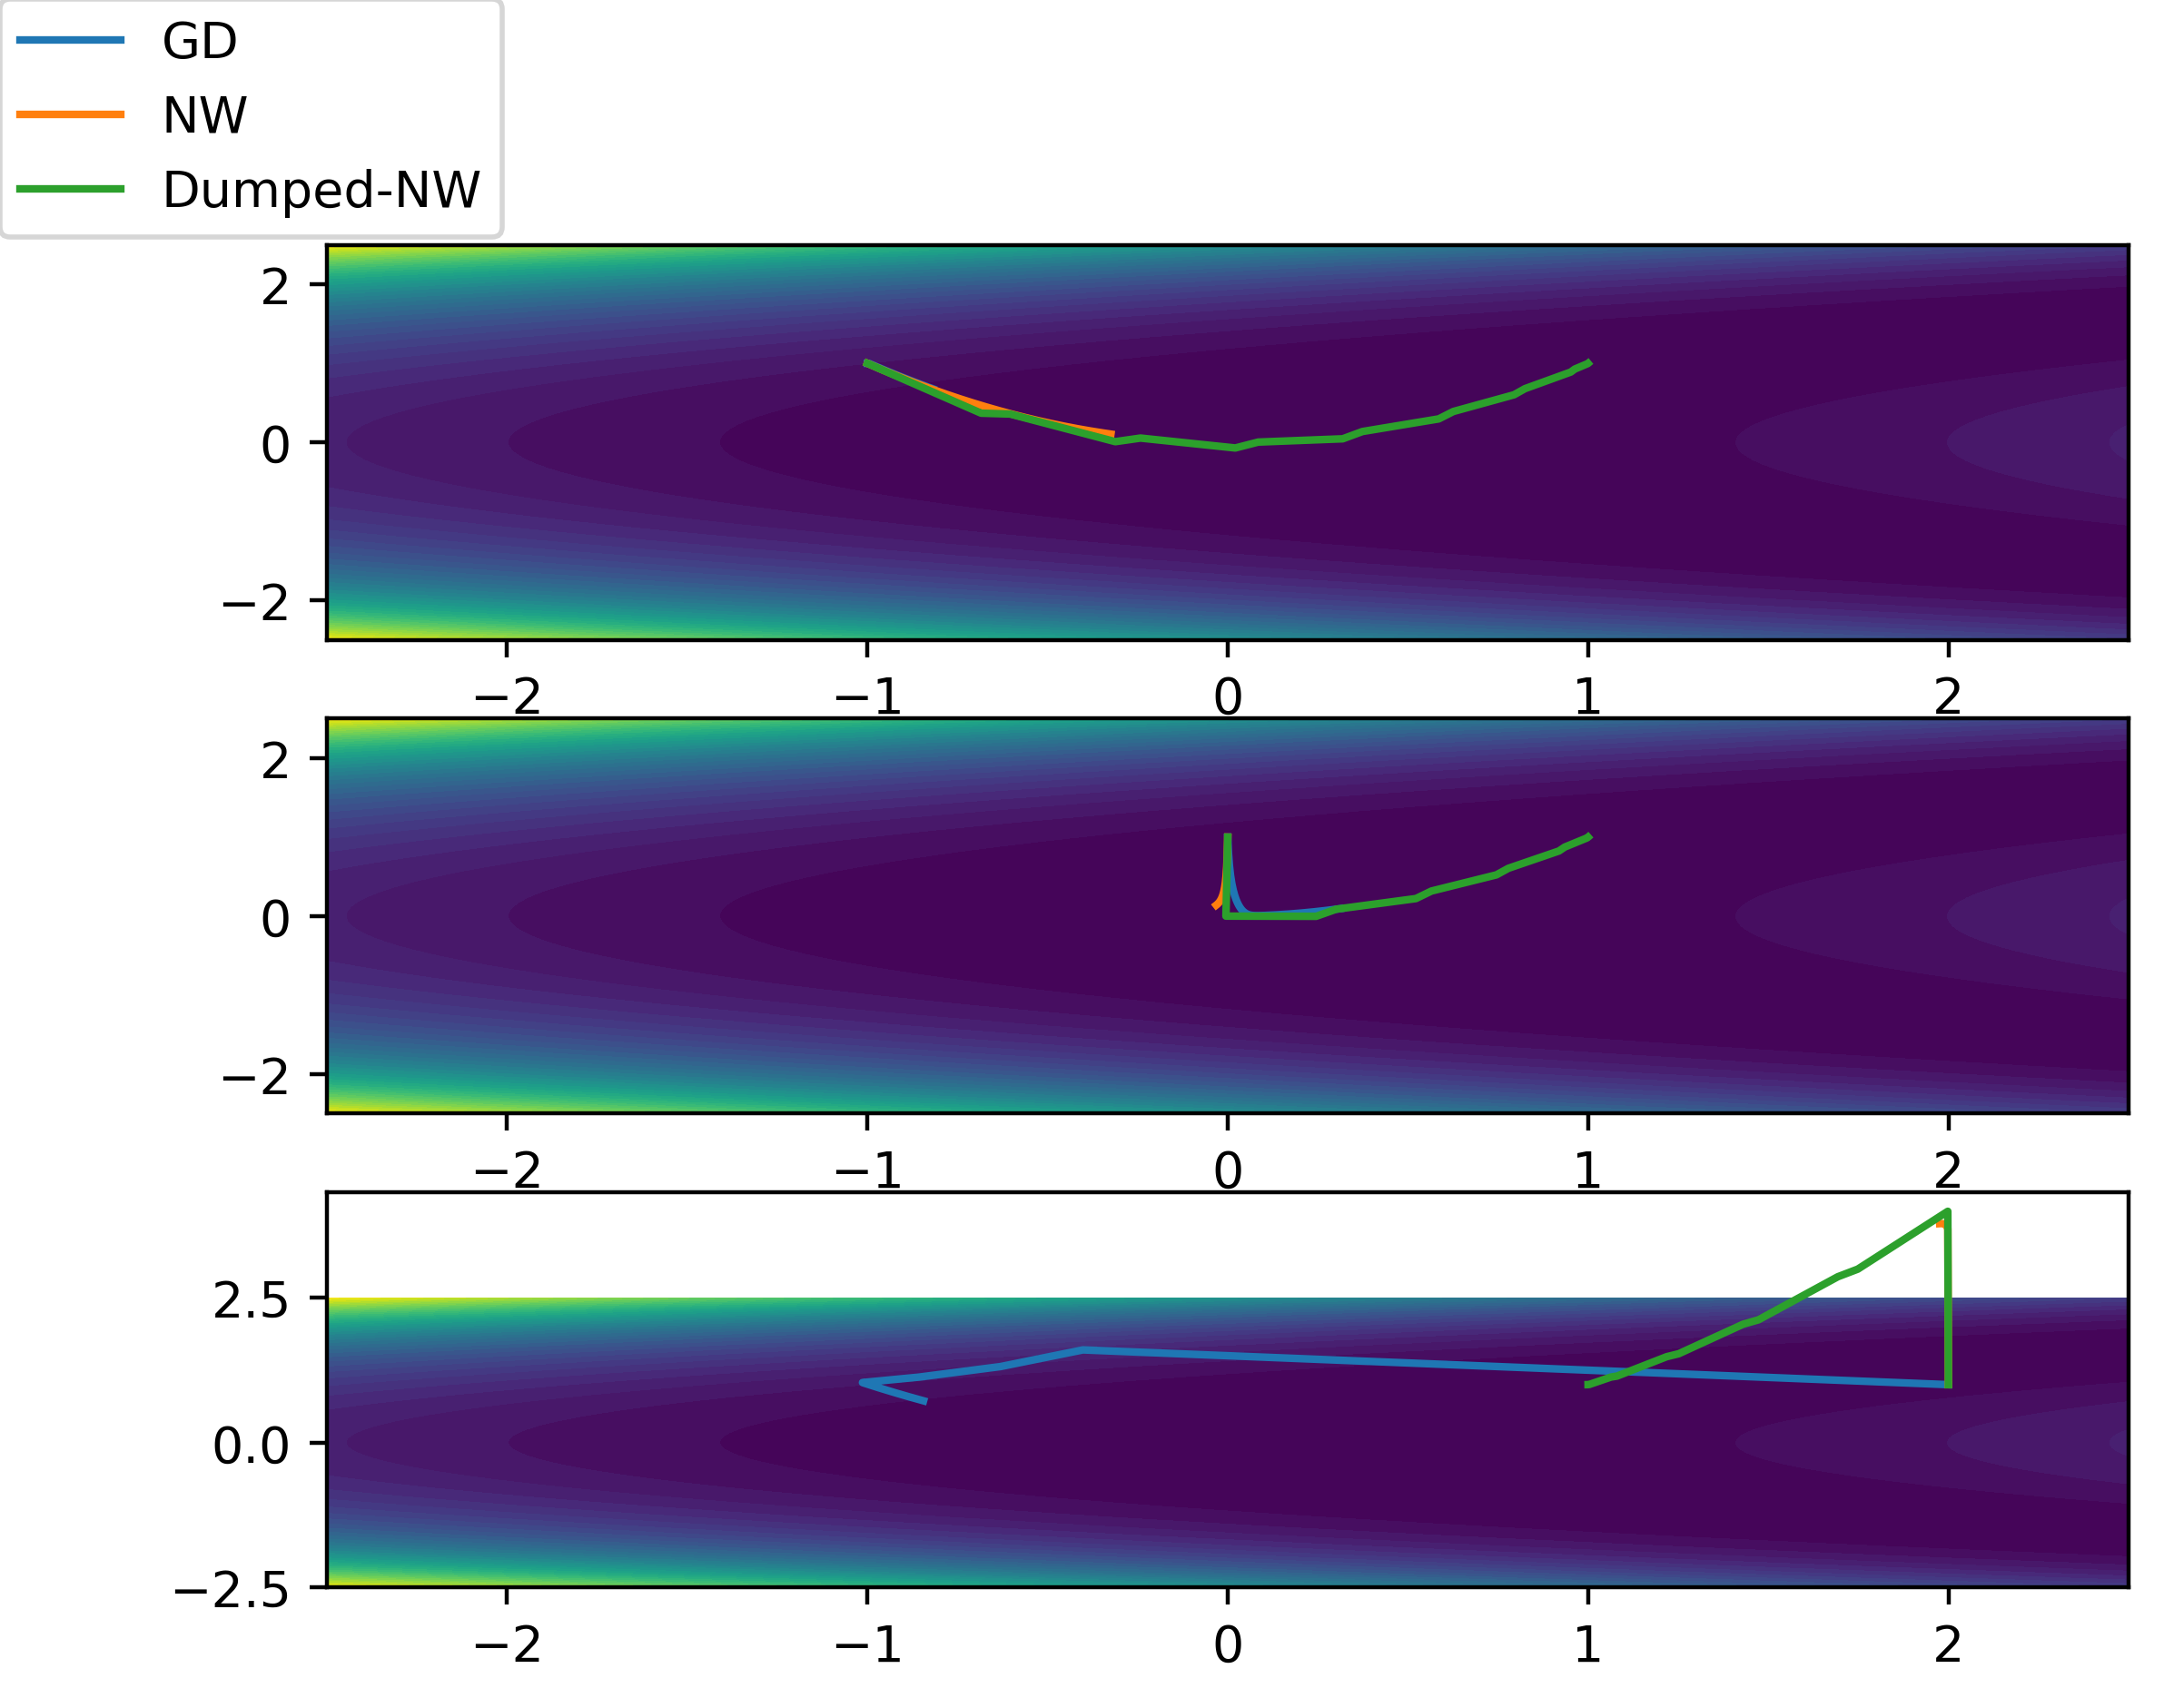

In [21]:

x = np.linspace(-2.5,2.5,100)
y = np.linspace(-2.5,2.5,100)
X,Y = np.meshgrid(x,y)
z = np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        z[i,j] = func([x[i],y[j]])

fig, ax = plt.subplots(3,1,dpi = 400)

xstar = np.array([1,1])
for i, x0 in enumerate([
    [-1, 1], [0,1],[2,1]
]):
    _,_,_, gd_his = gradient_descent(func, dfunc, x0, rho = 0.95, alpha = 0.001, xstar = xstar, limited_n = 10000)
    _,_,_, nw_his = newton(func, dfunc, d2func, x0, rho = 0.95, xstar = xstar, alpha = 0.001, limited_n = 3000)
    _,_,_, dn_his = dumped_Newton(func, dfunc, d2func, x0, rho = 0.95, xstar = xstar)

    ax[i].contourf(X, Y, z, 50, origin='lower')
    ax[i].plot(gd_his[:,0], gd_his[:,1], label = "GD")
    ax[i].plot(nw_his[:,0], nw_his[:,1], label = "NW")
    ax[i].plot(dn_his[:,0], dn_his[:,1], label = "Dumped-NW")
    lines, labels = ax[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper left', borderaxespad=0.)

可见最后能够准确到达 $(1,1)$ 这一最小值点的只有 Dumped Newton 方法

#### 6.12
Write a routine implementing the conjugate gradient method of Section $6.5 .6$ for unconstrained minimization. You will need a line search routine to determine the parameter $\alpha_k$ at each iteration. Try both the Fletcher-Reeves and Polak-Ribiere formulas for computing $\beta_{k+1}$ to see how much difference this makes. Test your routine on both quadratic and nonquadratic objective functions. For a reasonable error tolerance, does your routine terminate in at most $n$ steps for a quadratic function of $n$ variables?

In [122]:
def line_search(func, alpha, x0, s0, nums):
    """
    在 x0 到 x0 + alpha * s0 直线上进行线搜索
    进行等分线搜索
    """
    points = np.linspace(0, alpha, nums)
    value = [func(x0 + point) for point in points]
    optim_alpha = np.argmin(value); optim_value = value[optim_alpha]
    optim_alpha = points[optim_alpha]
    return optim_alpha, optim_value

def CG_with_line_search(func, dfunc, x0, xstar ,alpha, nums = 200,rho = 0.95, tol = 1e-5, limited_n = 1000, mode = 'Fletcher-Reeves'):
    """ 
    线搜索共轭梯度法
    """
    x0 = np.array(x0); x_his = [x0.tolist()]
    xstar = np.array(xstar); n = 1

    g0 = dfunc(x0); s0 = -g0

    loss = [np.linalg.norm(func(x0)-func(xstar))]
    while loss[-1] > tol:
        optim_alpha, optim_value = line_search(func, alpha * np.linalg.norm(s0), x0, s0 / np.linalg.norm(s0), nums = nums)
        # print(f"{s0[0]=}, {optim_alpha=}")
        x1 = x0 + optim_alpha * s0  / np.linalg.norm(s0)
        
        g1 = dfunc(x1)
        if mode == 'Fletcher-Reeves':
            beta1 = (g1.T @ g1) / (g0.T @ g0) # Fletcher-Reeves
        elif mode == "Polak-Ribiere":
            beta1 = ((g1.T - g0) @ g1) / (g0.T @ g0)
        s0 = -g1 + beta1 * s0
        x0 = x1; g0 = g1
        x_his.append(x0.tolist())
        
        
        if n > limited_n:
            print(f'CG: Iteration has completed {limited_n} times in GD. Stop.')
            break
        loss.append(np.linalg.norm(func(x1)-func(xstar)))
        n += 1
        if n%50 == 1:
            alpha *= rho
    return x1, loss, n, np.array(x_his)  

In [118]:
""" 使用两种方法处理二次函数问题 """
A = np.array([
    [2, 2],
    [1, 1]
]); A = A.T @ A
xstar = np.array([1,1]); b = A @ xstar
func = lambda x: 1/2 * (x.T @ A @ x) - b.T @ x
dfunc = lambda x: A @ x - b
x2, loss, n, x_his = CG_with_line_search(func, dfunc, np.zeros(2), xstar, alpha = 1, limited_n = 3000)
print(f"Fletcher-Reeves method result: loss:{loss[-1]}, n:{n}, end_x:{x2}")

s0[0]=10.0, optim_alpha=0.9949241142323283
s0[0]=3.8438423272139586, optim_alpha=0.30048318320837764
s0[0]=1.1487016961074579, optim_alpha=0.08163364410834897
s0[0]=0.37530413104010435, optim_alpha=0.026671366438772104
s0[0]=0.10420663444165776, optim_alpha=0.007405549533499883
s0[0]=0.030945849130328704, optim_alpha=0.0021991979667971106
Fletcher-Reeves method result: loss:4.01862297394473e-06, n:7, end_x:[0.99936607 0.99936607]


In [119]:
x2, loss, n, x_his = CG_with_line_search(func, dfunc, np.zeros(2), xstar, alpha = 1, limited_n = 3000, mode = "Polak-Ribiere")
print(f"Polak-Ribiere method result: loss:{loss[-1]}, n:{n}, end_x:{x2}")

s0[0]=10.0, optim_alpha=0.9949241142323283
s0[0]=0.8790182066109438, optim_alpha=0.29360108070360497
s0[0]=0.7042397667537235, optim_alpha=0.09008551621859526
s0[0]=0.10877187643147793, optim_alpha=0.025508944091394443
s0[0]=0.04927945542111889, optim_alpha=0.0070041883621011726
s0[0]=0.01138056670291487, optim_alpha=0.0021836829046550476
Polak-Ribiere method result: loss:4.104504901292216e-06, n:7, end_x:[0.99935934 0.99935934]


In [130]:
""" 使用两种方法处理非二次函数问题 """
def func(x): 
    return 2*x[0]**3 - 10*x[1]*x[0]

def dfunc(x): 
    return np.array([6*x[0]**2 - 10*x[1], -10*x[0]])

xstar = np.array([0,0])
x2, loss, n, x_his = CG_with_line_search(func, dfunc, [0.3,0.3], xstar, alpha = 0.00001, limited_n = 100, nums = 1000)
print(f"Fletcher-Reeves method result: loss:{loss[-1]}, n:{n}, end_x:{x2}")

s0[0]=2.46, optim_alpha=3.879639158478531e-05
s0[0]=4.920622706633081, optim_alpha=7.760251218168946e-05
s0[0]=7.382902438182913, optim_alpha=0.00011643458244832987
s0[0]=9.847874748518954, optim_alpha=0.00015530884280914417
s0[0]=12.316577391619449, optim_alpha=0.00019424156878506264
s0[0]=14.790051289189377, optim_alpha=0.0002332490863732762
s0[0]=17.26934150292215, optim_alpha=0.00027234778750199193
s0[0]=19.755498212963943, optim_alpha=0.0003115541455852355
s0[0]=22.24957770415307, optim_alpha=0.00035088473120297836
s0[0]=24.75264336162447, optim_alpha=0.0003903562279321591
s0[0]=27.2657666773904, optim_alpha=0.0004299854483545093
s0[0]=29.790028269533344, optim_alpha=0.0004697893502675029
s0[0]=32.32651891567662, optim_alpha=0.0005097850531252269
s0[0]=34.876340602430325, optim_alpha=0.0005499898547364988
s0[0]=37.44060759254812, optim_alpha=0.0005904212482481707
s0[0]=40.020447511571, optim_alpha=0.0006310969394422263
s0[0]=42.61700245578024, optim_alpha=0.0006720348643760247
s0[

In [131]:
x2, loss, n, x_his = CG_with_line_search(func, dfunc, [1,0.3], xstar, alpha = 0.000001, limited_n = 100, nums = 1000, mode = "Polak-Ribiere")
print(f"Polak-Ribiere method result: loss:{loss[-1]}, n:{n}, end_x:{x2}")

s0[0]=-3.0, optim_alpha=1.044030650891055e-05
s0[0]=-2.999844514353762, optim_alpha=1.0440170883306066e-05
s0[0]=-2.9997085192909636, optim_alpha=1.04401030778628e-05
s0[0]=-2.9995725260147834, optim_alpha=1.044003527484451e-05
s0[0]=-2.9994365347783356, optim_alpha=1.0439967475132118e-05
s0[0]=-2.9993005455815664, optim_alpha=1.043989967872556e-05
s0[0]=-2.999164558424423, optim_alpha=1.0439831885624764e-05
s0[0]=-2.9990285733068545, optim_alpha=1.0439764095829685e-05
s0[0]=-2.998892590228806, optim_alpha=1.043969630934025e-05
s0[0]=-2.998756609190224, optim_alpha=1.0439628526156393e-05
s0[0]=-2.998620630191058, optim_alpha=1.0439560746278061e-05
s0[0]=-2.9984846532312512, optim_alpha=1.043949296970519e-05
s0[0]=-2.9983486783107565, optim_alpha=1.0439425196437717e-05
s0[0]=-2.998212705429519, optim_alpha=1.0439357426475581e-05
s0[0]=-2.998076734587483, optim_alpha=1.043928965981872e-05
s0[0]=-2.9979407657846004, optim_alpha=1.0439221896467078e-05
s0[0]=-2.9978047990208156, optim_alpha

可以发现如果不是二次函数，效果就会非常糟糕

#### 2.
For a sparse positive definite martix A, if you have a way to find a sparse lower triangle matrix L so that L’AL has much a smaller condition number than A, how would you solve the linear equation Ax=b with Conjugate Gradient method?

我们设 $B = L^T AL$，那么原方程变为：
$$
LBL^T x = b
$$
由于下三角矩阵 $L$ 是稀疏的，因此求解 $Ly = b$ 是非常容易的，随后我们使用共轭梯度法求解：
$$
B(L^T x) = y
$$
$B$ 的条件数很小，所以这个方程依然是可以较容易计算的。最后化为了
$$
L^T x = z
$$
就可以求得$x$的值

#### 3.
Write the functions to achieve 

(1) CG method with a linear search method; 

(2) CG method for linear systems with positive definite matrix.

 Test these algorithms for a few matrix and check the orthogonal properties for the residuals for a large scale linear system.

In [94]:
def CG_PDmatrix(A, b, x0, xstar, alpha, rho = 0.95, tol = 1e-5, limited_n = 1000):
    """
    CG 专用解 Ax = b 其中 A 是一个正定矩阵
    """
    x0 = np.array(x0); x_his = [x0.tolist()]; r_his = []
    xstar = np.array(xstar); n = 1
    r0 = (A @ x0 - b); p0 = -r0

    loss = [np.linalg.norm(A @ (x0 - xstar))]
    while loss[-1] > tol:

        optim_alpha = r0.T @ r0 / (p0.T @ A @ p0)
        x1 = x0 + optim_alpha * p0
        r1 = r0 + optim_alpha * A @ p0
        beta0 = r1.T @ r1 / (r0.T @ r0)
        p1 = -r1 + beta0 * p0
        x0 = x1; r0 = r1; p0 = p1
        
        x_his.append(x0.tolist())
        
        if n > limited_n:
            print(f'CG: Iteration has completed {limited_n} times in GD. Stop.')
            break
        loss.append(np.linalg.norm(A @ (x0 - xstar)))
        n += 1
        if n%50 == 1:
            alpha *= rho
    return x1, loss, n, np.array(x_his)        

In [53]:
A = np.random.randn(500,500); A = A.T @ A; 
xstar = np.ones(500)
b = A @ xstar
x1, loss, n, x_his = CG_PDmatrix(A, b, np.zeros(500), xstar, alpha = 1, )
print(f"{loss[-1]=}")

loss[-1]=5.649965302493081e-06


In [95]:
func = lambda x: 1/2 * (x.T @ A @ x) - b.T @ x
dfunc = lambda x: A @ x - b
x2, loss, n, x_his = CG_with_line_search(func, dfunc, np.zeros(500), xstar, alpha = 1, limited_n = 3000)
print(f"{loss[-1]=}")

CG: Iteration has completed 3000 times in GD. Stop.
loss[-1]=54.74502068813308


可见使用 CG_PDmatrix 方法在处理正定矩阵方面确实比普适的线搜索方法要有效地多

#### 4.
 Achieve the interpolants of Runge’s function at equally spaced points.

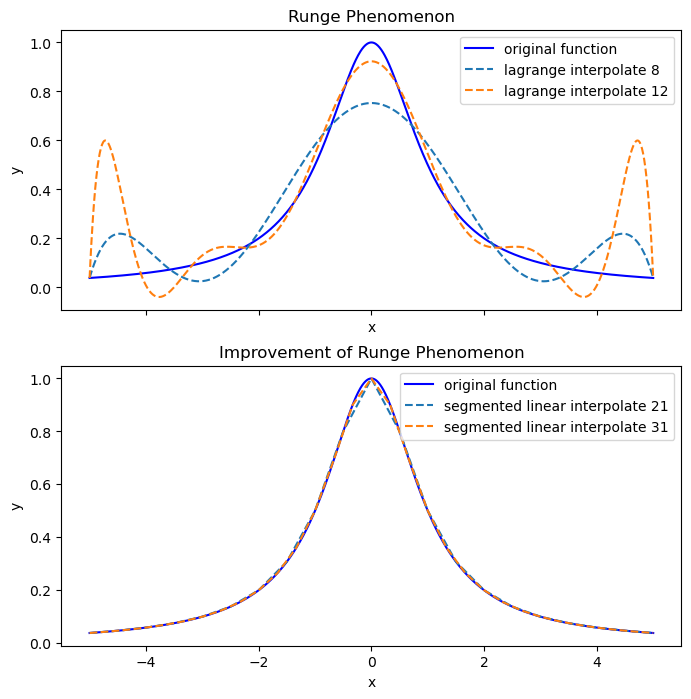

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator
"""定义方程"""
def func(x):
    return 1.0/(1.0+x**2)

"""拉格朗日插值"""
def lagrange(func, degree):
    x = np.linspace(-5,5,degree)
    y = func(x)
    return BarycentricInterpolator(x,y)

"""分段线性插值"""
def segmented_linear_interpolate(func, seg_number):
    x = np.linspace(-5,5, seg_number).T
    y = func(x)
    return x,y

x = np.linspace(-5,5,1000)
y = func(x)
fig, ax =plt.subplots(2,1,sharex= True, figsize = (8,8))
ax[0].set_title('Runge Phenomenon')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_title('Improvement of Runge Phenomenon')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[0].plot(x,func(x),'blue',label = 'original function')
ax[1].plot(x,func(x),'blue',label = 'original function')
# ax[0].plot(x, lagrange(func, 5)(x), '--',label = 'lagrange interpolate 5')
ax[0].plot(x, lagrange(func, 8)(x), '--',label = 'lagrange interpolate 8')
ax[0].plot(x, lagrange(func, 12)(x), '--',label = 'lagrange interpolate 12')
# ax[1].plot(segmented_linear_interpolate(func,11)[0],segmented_linear_interpolate(func,11)[1], '--', label = 'segmented linear interpolate 11')
ax[1].plot(segmented_linear_interpolate(func,21)[0],segmented_linear_interpolate(func,21)[1], '--', label = 'segmented linear interpolate 21')
ax[1].plot(segmented_linear_interpolate(func,31)[0],segmented_linear_interpolate(func,31)[1], '--', label = 'segmented linear interpolate 31')
ax[0].legend()
ax[1].legend()
plt.show()

#### 5.
Write the functions to find the natural cubic spline function using the shooting method and the B-spline method.

下面的代码是使用 B-样条构造自然三次样条的函数。只需要将 B 样条的第一个样条和最后一个样条的阶数为2，其余的阶数均为3，构造出的 B 样条就是自然边界条件的三次样条。

In [25]:
def B_spline(u_list, p_list, k = 3):
    """
    B 样条版本的自然三次样条
	params:
        u_list: 待求坐标
        p_list: 控制点的坐标集，应为一个 m*2 大小的 ndarray; 第一个数值为坐标，第2,3个数值为对应坐标值
        k: B 样条阶数
    return:
        result: 三次 B 样条在待求坐标下的值
	"""
    result = []
    n = len(p_list)
    for u_ind, u in enumerate(u_list):
        x, y = 0, 0
        k_tmp = k - 1 if (u_ind in [0, len(u_list)-1]) else k      
        for i in range(0, n - k - 1):            
            B_ik = deBoor_Cox(u, k_tmp, i, p_list[:,0])
            x += B_ik * p_list[i][1]; y += B_ik * p_list[i][2]
        result.append([x,y])
    return np.array(result)


def deBoor_Cox(u, k, i, p_list):
    """
    返回第 i 个 k 阶 B 样条在 u 点的值; p_list 是控制点集
    """
    if k==0:
        if p_list[i] <= u <= p_list[i+1]:
            return 1
        else:
            return 0
    else:
        coef_1, coef_2 = 0, 0
        if p_list[i+k] - p_list[i] == 0: # 重复节点情况
            coef_1 = 0
        else:
            coef_1 = (u-p_list[i]) / (p_list[i+k]-p_list[i])
        if p_list[i+k+1] - p_list[i+1] == 0: # 重复节点情况
            coef_2 = 0
        else:
            coef_2 = (p_list[i+k+1]-u) / (p_list[i+k+1]-p_list[i+1])
    return coef_1 * deBoor_Cox(u, k-1, i, p_list) + coef_2 * deBoor_Cox(u, k-1, i+1, p_list)

In [29]:
p_list = np.linspace(0,1, 30, endpoint = True)
tmp_p = np.linspace(0, 2*np.pi, 30, endpoint = True)
p_list = np.c_[p_list, tmp_p, np.exp(tmp_p) + np.random.randn(30)*0.05]
k = 3
u_list = np.linspace(0.1,0.9,20)
res_u = B_spline(u_list, p_list, k = k)

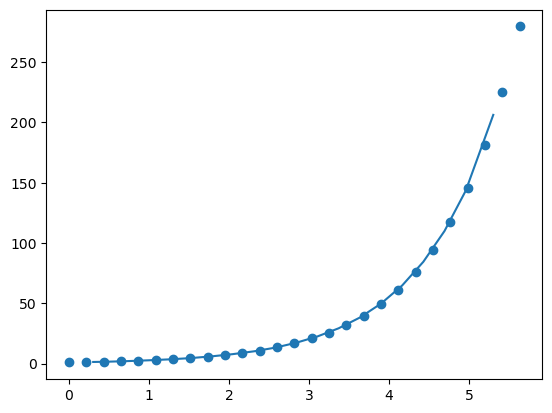

In [31]:
plt.scatter(p_list[:-3,1], p_list[:-3,2])
plt.plot(res_u[:,0], res_u[:,1])